## Day 2: Creating Synthetic Stock Market Data

Since we don’t have access to real stock market data right now, I am creating a **synthetic dataset**.  
This dataset will mimic real stock trading data with columns like:

- `date` → business/trading days  
- `open`, `high`, `low`, `close` → stock prices  
- `volume` → number of shares traded  

This synthetic data will allow me to proceed with analysis, just like I would with real stock data.  
Later, I can easily replace this with actual market data (from Yahoo Finance, Kaggle, etc.) without changing the workflow.


In [1]:
# Day 2: Creating Synthetic Stock Market Data

import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Generate 200 business days (like stock trading days)
dates = pd.bdate_range(start="2023-01-01", periods=200)

# Generate synthetic stock prices
price = 100 + np.cumsum(np.random.normal(0, 1, size=len(dates)))  # random walk

# Generate Open, High, Low, Close prices
open_price = price + np.random.normal(0, 0.5, size=len(dates))
close_price = price + np.random.normal(0, 0.5, size=len(dates))
high_price = np.maximum(open_price, close_price) + abs(np.random.normal(0, 0.5, size=len(dates)))
low_price = np.minimum(open_price, close_price) - abs(np.random.normal(0, 0.5, size=len(dates)))

# Generate synthetic trading volume
volume = np.random.randint(1000, 5000, size=len(dates))

# Create DataFrame
stock_data = pd.DataFrame({
    "date": dates,
    "open": open_price.round(2),
    "high": high_price.round(2),
    "low": low_price.round(2),
    "close": close_price.round(2),
    "volume": volume
})

# Save dataset as CSV (like a real downloaded dataset)
stock_data.to_csv("synthetic_stock_data.csv", index=False)

print("Synthetic dataset created and saved as 'synthetic_stock_data.csv'")
stock_data.head()


Synthetic dataset created and saved as 'synthetic_stock_data.csv'


,date,open,high,low,close,volume
0,2023-01-02,100.68,101.05,99.23,99.70,1886
1,2023-01-03,100.64,101.10,99.80,100.06,1427
2,2023-01-04,101.55,101.98,100.96,101.01,2328
3,2023-01-05,103.06,103.73,102.32,102.55,2895
4,2023-01-06,101.61,102.28,101.39,102.07,2994


## Loading the Synthetic Dataset

Now that I have created and saved the synthetic stock market dataset as a CSV file  
(`synthetic_stock_data.csv`), I will load it back into a DataFrame.  

This step simulates the real-world scenario where we would typically **download a dataset**  
and then load it for analysis.  

I will also display the **first few rows** and some basic information about the dataset  
to confirm that everything looks good.


In [2]:
# Load the synthetic dataset
stock_data_loaded = pd.read_csv("synthetic_stock_data.csv")

# Display the first few rows
print("First 5 rows of the dataset:")
display(stock_data_loaded.head())

# Check basic info about the dataset
print("\nDataset Info:")
print(stock_data_loaded.info())

# Check summary statistics
print("\nSummary Statistics:")
print(stock_data_loaded.describe())


First 5 rows of the dataset:


,date,open,high,low,close,volume
0,2023-01-02,100.68,101.05,99.23,99.70,1886
1,2023-01-03,100.64,101.10,99.80,100.06,1427
2,2023-01-04,101.55,101.98,100.96,101.01,2328
3,2023-01-05,103.06,103.73,102.32,102.55,2895
4,2023-01-06,101.61,102.28,101.39,102.07,2994



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    200 non-null    object 
 1   open    200 non-null    float64
 2   high    200 non-null    float64
 3   low     200 non-null    float64
 4   close   200 non-null    float64
 5   volume  200 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB
None

Summary Statistics:
             open        high         low       close       volume
count  200.000000  200.000000  200.000000  200.000000   200.000000
mean    92.126550   92.771850   91.413450   92.040850  2923.915000
std      4.133502    4.167547    4.095017    4.111077  1188.311732
min     86.130000   87.110000   85.780000   86.150000  1001.000000
25%     89.292500   89.857500   88.550000   89.162500  1829.750000
50%     91.105000   91.795000   90.280000   90.880000  2952.000000
75%     93.660000   94.44250

## Visualizing Stock Price Trends

To get an initial understanding of how the stock prices behave over time,  
I will plot the **Closing Price** across the trading days.  

This kind of line chart is one of the most common ways to visualize stock data,  
and it helps us quickly notice trends, upward or downward movements,  
and overall volatility.


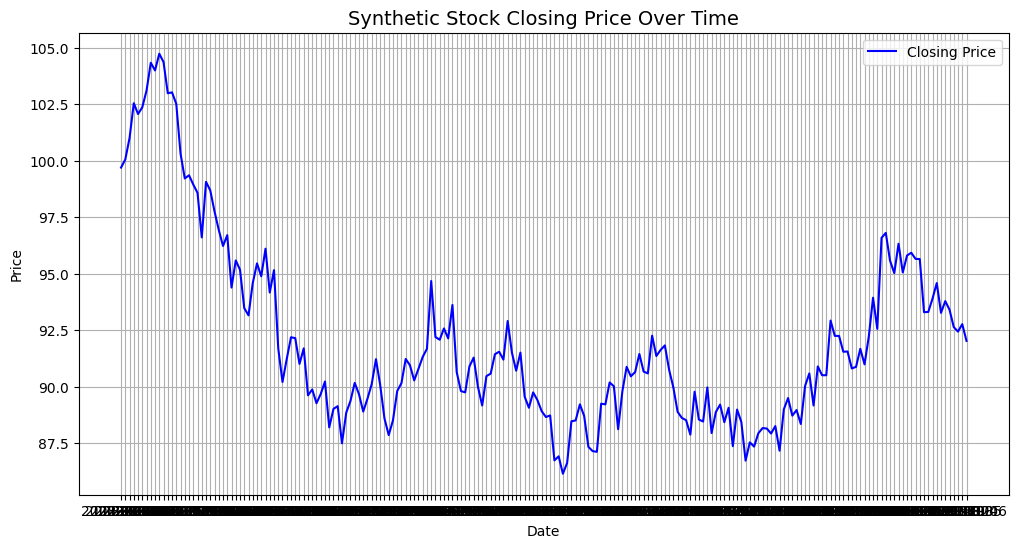

In [3]:
import matplotlib.pyplot as plt

# Plot Closing Price over time
plt.figure(figsize=(12,6))
plt.plot(stock_data_loaded["date"], stock_data_loaded["close"], label="Closing Price", color="blue")

plt.title("Synthetic Stock Closing Price Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()
